# Setup

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import krippendorff
import pingouin as pg
from sklearn.metrics import cohen_kappa_score

# Utils

In [2]:
def add_labels(ax, offset=0, color='black', fontsize=10):
  for container in ax.containers:
    for bar in container:
      height = bar.get_height()
      if height == 0:
        continue
      ax.text(
        bar.get_x() + bar.get_width() / 2.,
        height + offset,
        f'{int(height)}',
        ha='center',
        color=color,
        fontsize=fontsize
      )

# Load data

In [3]:
r1_df = pd.read_csv(f"./before_meeting_reviewer1.csv", encoding='utf-8')
r1_df.head()

,document,paragraph_index,original_text,simplified_text,q1,q2,q3,q3_1,q4,q5,review_date,review_elapsed_time
0,99bdc9fdd8097f067f77cb220074b1b5,1,Le presenti Linee programmatiche definiscono g...,Questo documento stabilisce le direzioni princ...,True,True,False,NaN,False,Mantenere gli acronimi delle strutture potrebb...,2024-06-10T12:57:25.276980,6
1,99bdc9fdd8097f067f77cb220074b1b5,2,"La situazione demografica, sanitaria, socio-ec...","La situazione in Basilicata, come in tutto il ...",True,False,False,NaN,False,NaN,2024-06-10T12:58:43.624315,77
2,99bdc9fdd8097f067f77cb220074b1b5,3,L'analisi di contesto della popolazione reside...,L'analisi della popolazione che vive in Basili...,True,False,False,NaN,False,"""percentuale uguale"" non è propriamente sinoni...",2024-06-10T13:01:12.714726,148
3,99bdc9fdd8097f067f77cb220074b1b5,4,La Basilicata ha una superficie di 10.073 kmq ...,La Basilicata copre un'area di 10.073 km² e ha...,True,False,False,NaN,False,NaN,2024-06-10T13:04:55.328050,221
4,99bdc9fdd8097f067f77cb220074b1b5,5,Molto interessante è l'aspetto della tendenza ...,"Negli ultimi 70 anni, alcune aree del territor...",True,False,False,NaN,False,NaN,2024-06-10T13:05:29.098786,33


In [4]:
r2_df = pd.read_csv(f"./before_meeting_reviewer2.csv", encoding='utf-8')
r2_df.head()

,document,paragraph_index,original_text,simplified_text,q1,q2,q3,q3_1,q4,q5,review_date,review_elapsed_time
0,99bdc9fdd8097f067f77cb220074b1b5,1,Le presenti Linee programmatiche definiscono g...,Questo documento stabilisce le direzioni princ...,True,False,False,NaN,False,il linguaggio utilizzato non è giuridico però ...,2024-06-10T21:46:20.981068,228
1,99bdc9fdd8097f067f77cb220074b1b5,2,"La situazione demografica, sanitaria, socio-ec...","La situazione in Basilicata, come in tutto il ...",True,False,False,NaN,False,NaN,2024-06-10T21:49:06.726929,153
2,99bdc9fdd8097f067f77cb220074b1b5,3,L'analisi di contesto della popolazione reside...,L'analisi della popolazione che vive in Basili...,True,False,False,NaN,False,NaN,2024-06-10T21:51:20.571851,118
3,99bdc9fdd8097f067f77cb220074b1b5,4,La Basilicata ha una superficie di 10.073 kmq ...,La Basilicata copre un'area di 10.073 km² e ha...,True,False,False,NaN,False,"Anche in questo caso il linguaggio ""semplifica...",2024-06-10T21:56:39.880861,292
4,99bdc9fdd8097f067f77cb220074b1b5,5,Molto interessante è l'aspetto della tendenza ...,"Negli ultimi 70 anni, alcune aree del territor...",True,False,False,NaN,True,NaN,2024-06-10T21:57:37.272537,56


In [ ]:
r3_df = pd.read_csv(f"./before_meeting_reviewer3.csv", encoding='utf-8')
r3_df.head()

,document,paragraph_index,original_text,simplified_text,q1,q2,q3,q3_1,q4,q5,review_date,review_elapsed_time
0,99bdc9fdd8097f067f77cb220074b1b5,1,Le presenti Linee programmatiche definiscono g...,Questo documento stabilisce le direzioni princ...,True,True,True,Manca il riferimento all'attuazione (elemento ...,False,NaN,2024-06-10T12:46:20.065860,157
1,99bdc9fdd8097f067f77cb220074b1b5,2,"La situazione demografica, sanitaria, socio-ec...","La situazione in Basilicata, come in tutto il ...",True,True,False,NaN,False,NaN,2024-06-10T13:48:53.167164,124
2,99bdc9fdd8097f067f77cb220074b1b5,3,L'analisi di contesto della popolazione reside...,L'analisi della popolazione che vive in Basili...,True,True,False,NaN,False,NaN,2024-06-10T13:49:21.795675,27
3,99bdc9fdd8097f067f77cb220074b1b5,4,La Basilicata ha una superficie di 10.073 kmq ...,La Basilicata copre un'area di 10.073 km² e ha...,True,True,False,NaN,False,NaN,2024-06-10T14:21:16.277183,119
4,99bdc9fdd8097f067f77cb220074b1b5,5,Molto interessante è l'aspetto della tendenza ...,"Negli ultimi 70 anni, alcune aree del territor...",True,True,False,NaN,False,NaN,2024-06-10T14:21:49.173714,32


# Q1 - Sono presenti tutte le informazioni essenziali?

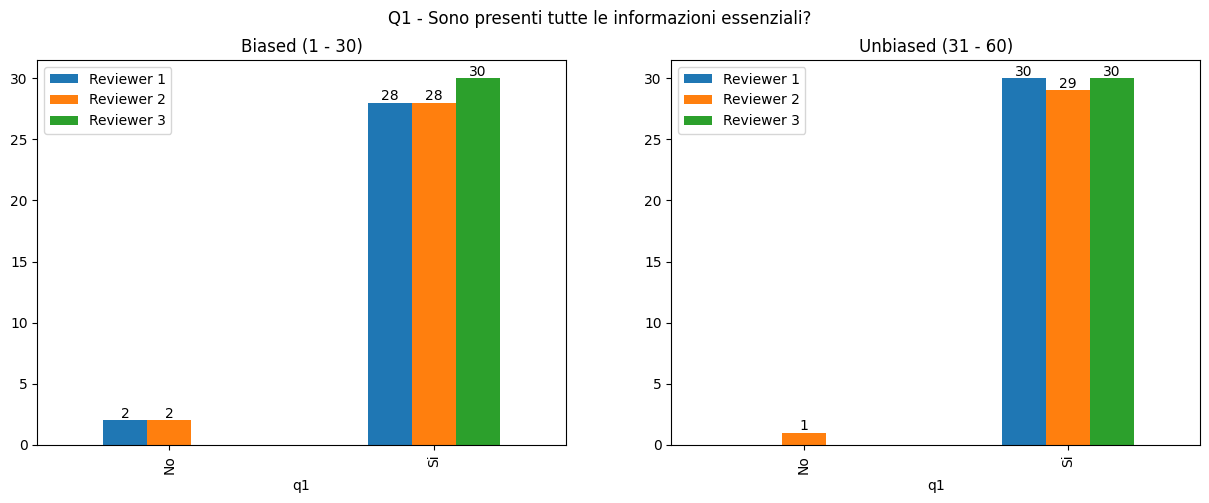

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Q1 - Sono presenti tutte le informazioni essenziali?')

df1 = pd.DataFrame({
    'Reviewer 1':   r1_df[r1_df['paragraph_index'] <= 30]['q1'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 2':   r2_df[r2_df['paragraph_index'] <= 30]['q1'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 3':   r3_df[r3_df['paragraph_index'] <= 30]['q1'].map({True: 'Si', False: 'No'}).value_counts(),
})
df2 = pd.DataFrame({
    'Reviewer 1':   r1_df[r1_df['paragraph_index'] > 30]['q1'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 2':   r2_df[r2_df['paragraph_index'] > 30]['q1'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 3':   r3_df[r3_df['paragraph_index'] > 30]['q1'].map({True: 'Si', False: 'No'}).value_counts(),
})

df1.plot(kind="bar", ax=axs[0])
df2.plot(kind="bar", ax=axs[1])

add_labels(axs[0], offset=0.2)
add_labels(axs[1], offset=0.2)

axs[0].set_title('Biased (1 - 30)')
axs[1].set_title('Unbiased (31 - 60)')

plt.show()

# Q2 - Sono presenti parti/informazioni superflue che sono state eliminate?

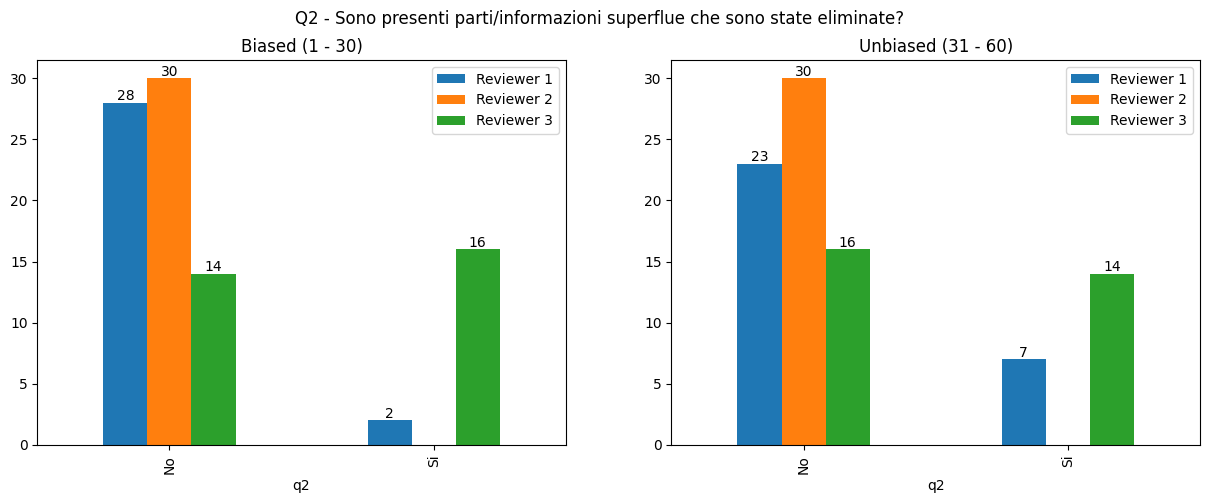

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Q2 - Sono presenti parti/informazioni superflue che sono state eliminate?')

df1 = pd.DataFrame({
    'Reviewer 1':   r1_df[r1_df['paragraph_index'] <= 30]['q2'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 2':   r2_df[r2_df['paragraph_index'] <= 30]['q2'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 3':   r3_df[r3_df['paragraph_index'] <= 30]['q2'].map({True: 'Si', False: 'No'}).value_counts(),
})
df2 = pd.DataFrame({
    'Reviewer 1':   r1_df[r1_df['paragraph_index'] > 30]['q2'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 2':   r2_df[r2_df['paragraph_index'] > 30]['q2'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 3':   r3_df[r3_df['paragraph_index'] > 30]['q2'].map({True: 'Si', False: 'No'}).value_counts(),
})

df1.plot(kind="bar", ax=axs[0])
df2.plot(kind="bar", ax=axs[1])

add_labels(axs[0], offset=0.2)
add_labels(axs[1], offset=0.2)

axs[0].set_title('Biased (1 - 30)')
axs[1].set_title('Unbiased (31 - 60)')

plt.show()

# Q3 - Sono presenti parole (tecnicismi) con effetto giuridico che sono state cancellate creando problematicità al testo semplificato?

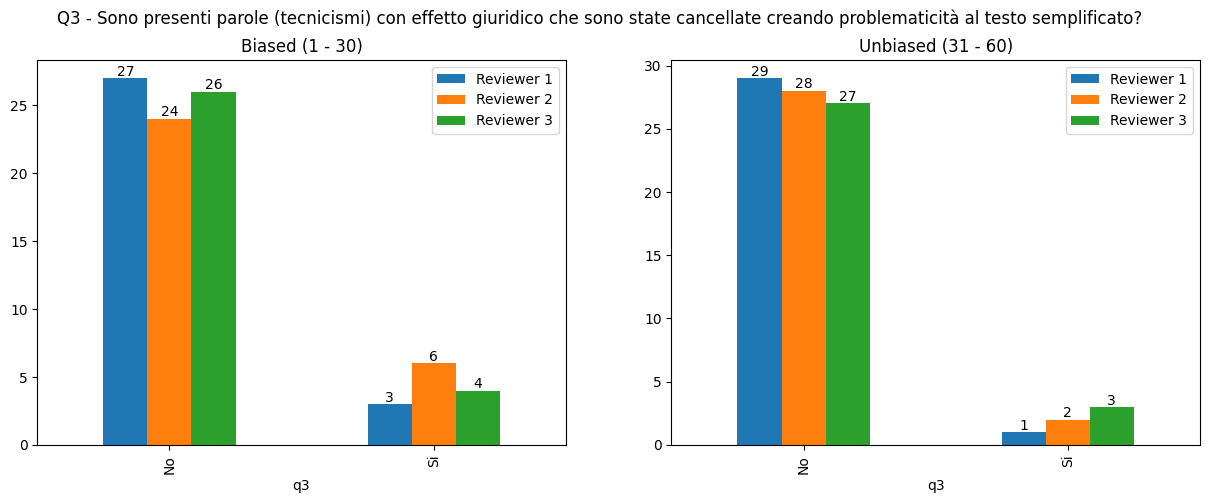

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Q3 - Sono presenti parole (tecnicismi) con effetto giuridico che sono state cancellate creando problematicità al testo semplificato?')

df1 = pd.DataFrame({
    'Reviewer 1':   r1_df[r1_df['paragraph_index'] <= 30]['q3'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 2':   r2_df[r2_df['paragraph_index'] <= 30]['q3'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 3':   r3_df[r3_df['paragraph_index'] <= 30]['q3'].map({True: 'Si', False: 'No'}).value_counts(),
})
df2 = pd.DataFrame({
    'Reviewer 1':   r1_df[r1_df['paragraph_index'] > 30]['q3'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 2':   r2_df[r2_df['paragraph_index'] > 30]['q3'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 3':   r3_df[r3_df['paragraph_index'] > 30]['q3'].map({True: 'Si', False: 'No'}).value_counts(),
})

df1.plot(kind="bar", ax=axs[0])
df2.plot(kind="bar", ax=axs[1])

add_labels(axs[0], offset=0.2)
add_labels(axs[1], offset=0.2)

axs[0].set_title('Biased (1 - 30)')
axs[1].set_title('Unbiased (31 - 60)')

plt.show()

# Q3.1

## R1

In [9]:
for a in r1_df.dropna(subset='q3_1').to_dict(orient='records'):
  print(f'====== {a["paragraph_index"]} ======')
  print(a['original_text'])
  print('-------------')
  print(a['simplified_text'])
  print('-------------')
  print(a['q3_1'])
  print()

====== 12 ======
La componente sanitaria deve operare in stretto raccordo con la componente sociale, al fine di garantire in maniera integrata e coordinata le prestazioni sociosanitarie, siano queste a rilevanza sanitaria o sociale, come ribadito anche dal Piano Sociale Nazionale 2021-2023 predisposto in attuazione dell'art. 21 del D.Lgs. 147/2017che rimarca l'importanza che l'integrazione avvenga già dalla fase programmatoria, in quanto è necessario dare risposte "opportune al cittadino senza che esso venga rinviato a competenze di altri enti e livelli istituzionali". 
-------------
Il settore della salute deve lavorare insieme a quello sociale per offrire servizi integrati e coordinati, sia che si tratti di assistenza sanitaria o sociale. Questo approccio è sottolineato anche dal Piano Sociale Nazionale 2021-2023, che segue l'articolo 21 del Decreto Legislativo 147/2017. Il Piano evidenzia l'importanza di iniziare questa integrazione già nella fase di pianificazione, per fornire risp

## R2

In [10]:
for a in r2_df.dropna(subset='q3_1').to_dict(orient='records'):
  print(f'====== {a["paragraph_index"]} ======')
  print(a['original_text'])
  print('-------------')
  print(a['simplified_text'])
  print('-------------')
  print(a['q3_1'])
  print()

====== 9 ======
Si rende necessario adeguare il livello dell'Assistenza Distrettuale, come definito dal Capo III, art. 3-20, del DPCM LEA 12 gennaio 2017e dal Decreto 23 maggio 2022, n. 77 art. 1 allegato 1 e allegato 2 prescrittivo. 
-------------
È necessario migliorare il livello dell'Assistenza Distrettuale secondo quanto stabilito dal Capo III, articoli 3-20, del DPCM LEA del 12 gennaio 2017 e dal Decreto del 23 maggio 2022, numero 77, articolo 1, allegato 1 e allegato 2.
-------------
avrei lasciato l'aggettivo prescritto in riferimento all'allegato 2 della norma indicata perché distingue l'allegato 1 che, al contrario, ha natura descrittiva.

====== 12 ======
La componente sanitaria deve operare in stretto raccordo con la componente sociale, al fine di garantire in maniera integrata e coordinata le prestazioni sociosanitarie, siano queste a rilevanza sanitaria o sociale, come ribadito anche dal Piano Sociale Nazionale 2021-2023 predisposto in attuazione dell'art. 21 del D.Lgs. 1

## R3

In [11]:
for a in r3_df.dropna(subset='q3_1').to_dict(orient='records'):
  print(f'====== {a["paragraph_index"]} ======')
  print(a['original_text'])
  print('-------------')
  print(a['simplified_text'])
  print('-------------')
  print(a['q3_1'])
  print()

====== 1 ======
Le presenti Linee programmatiche definiscono gli indirizzi per la programmazione regionale, stabilendo le linee di azione e organizzative prioritarie per il Sistema sanitario regionale attuazione della riforma territoriale ai sensi del DM 23 maggio 2022, n. 77. Tali linee programmatiche, che devono essere declinate nella programmazione attuativa aziendale non si intendono esaustive delle attività e dei servizi che devono essere garantiti in adempimento della normativa statale e regionale, ma indicano le priorità individuate dalla Regione. Il presente documento indirizza le funzionalità, i modelli organizzativi e di servizio, i mix di professionalità necessari per il concreto avvio delle Case di Comunità (CdC), Ospedali di Comunità (OdC), Centrali Operative Territoriali (COT), Infermiere di Famiglia e Comunità (IFeC), Assistenza Domiciliare Integrata (ADI) e tutte le altre componenti rilevanti per lo sviluppo dei servizi territoriali per promuovere la prevenzione primari

# Q4 - Sono stati introdotti errori interpretativi?

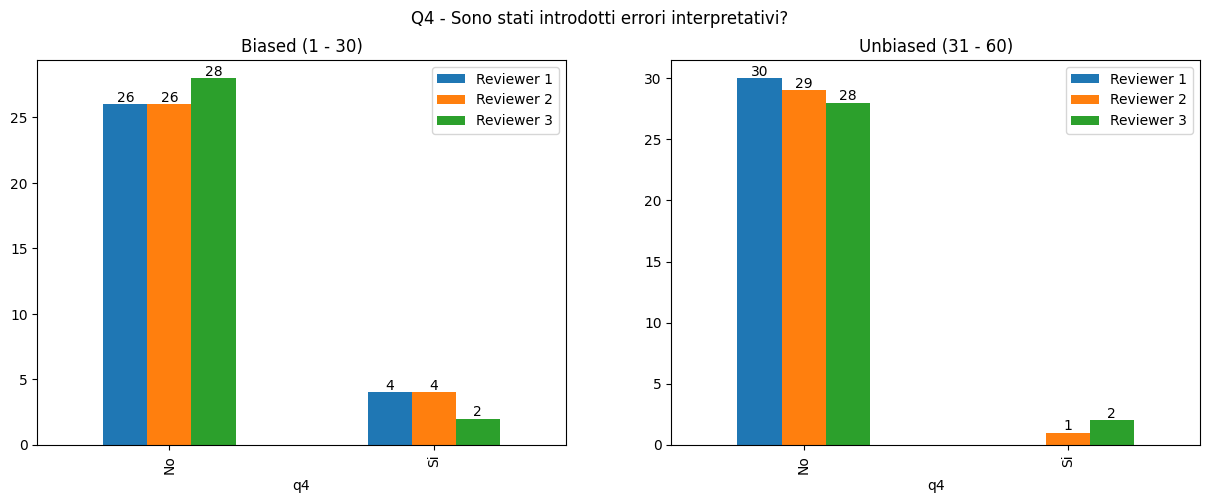

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Q4 - Sono stati introdotti errori interpretativi?')

df1 = pd.DataFrame({
    'Reviewer 1':   r1_df[r1_df['paragraph_index'] <= 30]['q4'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 2':   r2_df[r2_df['paragraph_index'] <= 30]['q4'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 3':   r3_df[r3_df['paragraph_index'] <= 30]['q4'].map({True: 'Si', False: 'No'}).value_counts(),
})
df2 = pd.DataFrame({
    'Reviewer 1':   r1_df[r1_df['paragraph_index'] > 30]['q4'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 2':   r2_df[r2_df['paragraph_index'] > 30]['q4'].map({True: 'Si', False: 'No'}).value_counts(),
    'Reviewer 3':   r3_df[r3_df['paragraph_index'] > 30]['q4'].map({True: 'Si', False: 'No'}).value_counts(),
})

df1.plot(kind="bar", ax=axs[0])
df2.plot(kind="bar", ax=axs[1])

add_labels(axs[0], offset=0.2)
add_labels(axs[1], offset=0.2)

axs[0].set_title('Biased (1 - 30)')
axs[1].set_title('Unbiased (31 - 60)')

plt.show()

# Q5

## R1

In [13]:
for a in r1_df.dropna(subset='q5').to_dict(orient='records'):
  print(f'====== {a["paragraph_index"]} ======')
  print(a['original_text'])
  print('-------------')
  print(a['simplified_text'])
  print('-------------')
  print(a['q5'])
  print()

====== 1 ======
Le presenti Linee programmatiche definiscono gli indirizzi per la programmazione regionale, stabilendo le linee di azione e organizzative prioritarie per il Sistema sanitario regionale attuazione della riforma territoriale ai sensi del DM 23 maggio 2022, n. 77. Tali linee programmatiche, che devono essere declinate nella programmazione attuativa aziendale non si intendono esaustive delle attività e dei servizi che devono essere garantiti in adempimento della normativa statale e regionale, ma indicano le priorità individuate dalla Regione. Il presente documento indirizza le funzionalità, i modelli organizzativi e di servizio, i mix di professionalità necessari per il concreto avvio delle Case di Comunità (CdC), Ospedali di Comunità (OdC), Centrali Operative Territoriali (COT), Infermiere di Famiglia e Comunità (IFeC), Assistenza Domiciliare Integrata (ADI) e tutte le altre componenti rilevanti per lo sviluppo dei servizi territoriali per promuovere la prevenzione primari

## R2

In [14]:
for a in r2_df.dropna(subset='q5').to_dict(orient='records'):
  print(f'====== {a["paragraph_index"]} ======')
  print(a['original_text'])
  print('-------------')
  print(a['simplified_text'])
  print('-------------')
  print(a['q5'])
  print()

====== 1 ======
Le presenti Linee programmatiche definiscono gli indirizzi per la programmazione regionale, stabilendo le linee di azione e organizzative prioritarie per il Sistema sanitario regionale attuazione della riforma territoriale ai sensi del DM 23 maggio 2022, n. 77. Tali linee programmatiche, che devono essere declinate nella programmazione attuativa aziendale non si intendono esaustive delle attività e dei servizi che devono essere garantiti in adempimento della normativa statale e regionale, ma indicano le priorità individuate dalla Regione. Il presente documento indirizza le funzionalità, i modelli organizzativi e di servizio, i mix di professionalità necessari per il concreto avvio delle Case di Comunità (CdC), Ospedali di Comunità (OdC), Centrali Operative Territoriali (COT), Infermiere di Famiglia e Comunità (IFeC), Assistenza Domiciliare Integrata (ADI) e tutte le altre componenti rilevanti per lo sviluppo dei servizi territoriali per promuovere la prevenzione primari

## R3

In [15]:
for a in r3_df.dropna(subset='q5').to_dict(orient='records'):
  print(f'====== {a["paragraph_index"]} ======')
  print(a['original_text'])
  print('-------------')
  print(a['simplified_text'])
  print('-------------')
  print(a['q5'])
  print()

====== 8 ======
La distribuzione per comune dell'ICC mette in luce la presenza di aree geografiche caratterizzate da una quota elevata di popolazione affetta da patologie croniche.
-------------
La distribuzione dell'ICC nei vari comuni mostra che ci sono zone geografiche dove molte persone soffrono di malattie croniche.
-------------
L''espressione "molte persone" dà la sensazione di essere meno precisa rispetto a "quota elevata" visto che si tratta di dati 

====== 10 ======
Il presente Piano Operativo Territoriale è finalizzato a promuovere, attraverso gli strumenti del governo clinico, la qualità dell'assistenza, vale a dire un'assistenza che sia:
- Efficace, fornendo servizi sanitari basati sull'evidenza a coloro che ne hanno bisogno;
- Sicura, evitando danni alle persone cui è destinata la cura;
- Centrata sulle persone, fornendo cure che rispondano alle preferenze, ai bisogni e ai valori delle singole persone, così come alle culture delle loro comunità;
- Tempestiva, riducendo i

# Statistical Tests

## Cohen kappa

### Biased (1-30)

In [16]:
r1 = r1_df[r1_df['paragraph_index'] <= 30]
r2 = r2_df[r2_df['paragraph_index'] <= 30]
r3 = r3_df[r3_df['paragraph_index'] <= 30]
print('q1')
print('r1 vs r2: ', cohen_kappa_score(r1['q1'], r2['q1']))
print('r2 vs r3: ', cohen_kappa_score(r2['q1'], r3['q1']))
print('r1 vs r3: ', cohen_kappa_score(r1['q1'], r3['q1']))

print('\nq2')
print('r1 vs r2: ', cohen_kappa_score(r1['q2'], r2['q2']))
print('r2 vs r3: ', cohen_kappa_score(r2['q2'], r3['q2']))
print('r1 vs r3: ', cohen_kappa_score(r1['q2'], r3['q2']))

print('\nq3')
print('r1 vs r2: ', cohen_kappa_score(r1['q3'], r2['q3']))
print('r2 vs r3: ', cohen_kappa_score(r2['q3'], r3['q3']))
print('r1 vs r3: ', cohen_kappa_score(r1['q3'], r3['q3']))

print('\nq4')
print('r1 vs r2: ', cohen_kappa_score(r1['q4'], r2['q4']))
print('r2 vs r3: ', cohen_kappa_score(r2['q4'], r3['q4']))
print('r1 vs r3: ', cohen_kappa_score(r1['q4'], r3['q4']))

q1
r1 vs r2:  -0.0714285714285714
r2 vs r3:  0.0
r1 vs r3:  0.0

q2
r1 vs r2:  0.0
r2 vs r3:  0.0
r1 vs r3:  0.11764705882352944

q3
r1 vs r2:  0.10256410256410264
r2 vs r3:  0.04761904761904767
r1 vs r3:  -0.12903225806451601

q4
r1 vs r2:  0.42307692307692313
r2 vs r3:  0.2682926829268293
r1 vs r3:  0.2682926829268293


### Unbiased (31-60)

In [17]:
r1 = r1_df[r1_df['paragraph_index'] > 30]
r2 = r2_df[r2_df['paragraph_index'] > 30]
r3 = r3_df[r3_df['paragraph_index'] > 30]
print('q1')
print('r1 vs r2: ', cohen_kappa_score(r1['q1'], r2['q1']))
print('r2 vs r3: ', cohen_kappa_score(r2['q1'], r3['q1']))
print('r1 vs r3: ', cohen_kappa_score(r1['q1'], r3['q1']))

print('\nq2')
print('r1 vs r2: ', cohen_kappa_score(r1['q2'], r2['q2']))
print('r2 vs r3: ', cohen_kappa_score(r2['q2'], r3['q2']))
print('r1 vs r3: ', cohen_kappa_score(r1['q2'], r3['q2']))

print('\nq3')
print('r1 vs r2: ', cohen_kappa_score(r1['q3'], r2['q3']))
print('r2 vs r3: ', cohen_kappa_score(r2['q3'], r3['q3']))
print('r1 vs r3: ', cohen_kappa_score(r1['q3'], r3['q3']))

print('\nq4')
print('r1 vs r2: ', cohen_kappa_score(r1['q4'], r2['q4']))
print('r2 vs r3: ', cohen_kappa_score(r2['q4'], r3['q4']))
print('r1 vs r3: ', cohen_kappa_score(r1['q4'], r3['q4']))

q1
r1 vs r2:  0.0
r2 vs r3:  0.0
r1 vs r3:  nan

q2
r1 vs r2:  0.0
r2 vs r3:  0.0
r1 vs r3:  0.10138248847926257

q3
r1 vs r2:  0.6511627906976745
r2 vs r3:  -0.0869565217391306
r1 vs r3:  -0.05263157894736836

q4
r1 vs r2:  0.0
r2 vs r3:  -0.04651162790697683
r1 vs r3:  0.0


c:\Users\marco\Desktop\ai-rom-ii\.venv\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\marco\Desktop\ai-rom-ii\.venv\Lib\site-packages\sklearn\metrics\_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


## Krippendorff alpha

### Biased (1-30)

In [18]:
r1 = r1_df[r1_df['paragraph_index'] <= 30]
r2 = r2_df[r2_df['paragraph_index'] <= 30]
r3 = r3_df[r3_df['paragraph_index'] <= 30]

print('q1')
print(krippendorff.alpha(reliability_data=[r1['q1'].astype(int), r2['q1'].astype(int), r3['q1'].astype(int)], level_of_measurement="nominal"))

print('\nq2')
print(krippendorff.alpha(reliability_data=[r1['q2'].astype(int), r2['q2'].astype(int), r3['q2'].astype(int)], level_of_measurement="nominal"))

print('\nq3')
print(krippendorff.alpha(reliability_data=[r1['q3'].astype(int), r2['q3'].astype(int), r3['q3'].astype(int)], level_of_measurement="nominal"))

print('\nq4')
print(krippendorff.alpha(reliability_data=[r1['q4'].astype(int), r2['q4'].astype(int), r3['q4'].astype(int)], level_of_measurement="nominal"))

q1
-0.03488372093023262

q2
-0.09876543209876543

q3
0.02197802197802201

q4
0.3325


### Unbiased (31-60)

In [19]:
r1 = r1_df[r1_df['paragraph_index'] > 30]
r2 = r2_df[r2_df['paragraph_index'] > 30]
r3 = r3_df[r3_df['paragraph_index'] > 30]

print('q1')
print(krippendorff.alpha(reliability_data=[r1['q1'].astype(int), r2['q1'].astype(int), r3['q1'].astype(int)], level_of_measurement="nominal"))

print('\nq2')
print(krippendorff.alpha(reliability_data=[r1['q2'].astype(int), r2['q2'].astype(int), r3['q2'].astype(int)], level_of_measurement="nominal"))

print('\nq3')
print(krippendorff.alpha(reliability_data=[r1['q3'].astype(int), r2['q3'].astype(int), r3['q3'].astype(int)], level_of_measurement="nominal"))

print('\nq4')
print(krippendorff.alpha(reliability_data=[r1['q4'].astype(int), r2['q4'].astype(int), r3['q4'].astype(int)], level_of_measurement="nominal"))

q1
0.0

q2
-0.044168391994479084

q3
0.11706349206349198

q4
-0.02298850574712641


## Cronbach alpha

### Biased (1-30)

In [20]:
for i in range(1, 31):
  print(f'paragraph{i}')
  r1 = r1_df[r1_df['paragraph_index'] == i]
  r2 = r2_df[r2_df['paragraph_index'] == i]
  r3 = r3_df[r3_df['paragraph_index'] == i]
  d = pd.DataFrame({
      'q1': [r1['q1'].astype(int).values[0], r2['q1'].astype(int).values[0], r3['q1'].astype(int).values[0]],
      'q2': [r1['q2'].astype(int).values[0], r2['q2'].astype(int).values[0], r3['q2'].astype(int).values[0]],
      'q3': [r1['q3'].astype(int).values[0], r2['q3'].astype(int).values[0], r3['q3'].astype(int).values[0]],
      'q4': [r1['q4'].astype(int).values[0], r2['q4'].astype(int).values[0], r3['q4'].astype(int).values[0]],
  })
  print(d)
  print(pg.cronbach_alpha(data=d))

paragraph1
   q1  q2  q3  q4
0   1   1   0   0
1   1   0   0   0
2   1   1   1   0
(np.float64(0.4444444444444443), array([-3.033,  0.986]))
paragraph2
   q1  q2  q3  q4
0   1   0   0   0
1   1   0   0   0
2   1   1   0   0
(np.float64(0.0), array([-6.26 ,  0.975]))
paragraph3
   q1  q2  q3  q4
0   1   0   0   0
1   1   0   0   0
2   1   1   0   0
(np.float64(0.0), array([-6.26 ,  0.975]))
paragraph4
   q1  q2  q3  q4
0   1   0   0   0
1   1   0   0   0
2   1   1   0   0
(np.float64(0.0), array([-6.26 ,  0.975]))
paragraph5
   q1  q2  q3  q4
0   1   0   0   0
1   1   0   0   1
2   1   1   0   0
(np.float64(-1.3333333333333333), array([-15.94 ,   0.941]))
paragraph6
   q1  q2  q3  q4
0   1   0   0   1
1   1   0   0   0
2   1   1   0   0
(np.float64(-1.333333333333334), array([-15.94 ,   0.941]))
paragraph7
   q1  q2  q3  q4
0   1   0   0   0
1   1   0   0   0
2   1   1   0   0
(np.float64(0.0), array([-6.26 ,  0.975]))
paragraph8
   q1  q2  q3  q4
0   1   0   0   0
1   1   0   0   0
2  

c:\Users\marco\Desktop\ai-rom-ii\.venv\Lib\site-packages\pingouin\reliability.py:144: RuntimeWarning: invalid value encountered in scalar divide
  cronbach = (k / (k - 1)) * (1 - np.trace(C) / C.sum().sum())
c:\Users\marco\Desktop\ai-rom-ii\.venv\Lib\site-packages\pingouin\reliability.py:144: RuntimeWarning: invalid value encountered in scalar divide
  cronbach = (k / (k - 1)) * (1 - np.trace(C) / C.sum().sum())
c:\Users\marco\Desktop\ai-rom-ii\.venv\Lib\site-packages\pingouin\reliability.py:144: RuntimeWarning: invalid value encountered in scalar divide
  cronbach = (k / (k - 1)) * (1 - np.trace(C) / C.sum().sum())
c:\Users\marco\Desktop\ai-rom-ii\.venv\Lib\site-packages\pingouin\reliability.py:144: RuntimeWarning: invalid value encountered in scalar divide
  cronbach = (k / (k - 1)) * (1 - np.trace(C) / C.sum().sum())
c:\Users\marco\Desktop\ai-rom-ii\.venv\Lib\site-packages\pingouin\reliability.py:144: RuntimeWarning: invalid value encountered in scalar divide
  cronbach = (k / (k - 

### Unbiased (31-60)

In [21]:
for i in range(31, 60):
  print(f'paragraph{i}')
  r1 = r1_df[r1_df['paragraph_index'] == i]
  r2 = r2_df[r2_df['paragraph_index'] == i]
  r3 = r3_df[r3_df['paragraph_index'] == i]
  d = pd.DataFrame({
      'q1': [r1['q1'].astype(int).values[0], r2['q1'].astype(int).values[0], r3['q1'].astype(int).values[0]],
      'q2': [r1['q2'].astype(int).values[0], r2['q2'].astype(int).values[0], r3['q2'].astype(int).values[0]],
      'q3': [r1['q3'].astype(int).values[0], r2['q3'].astype(int).values[0], r3['q3'].astype(int).values[0]],
      'q4': [r1['q4'].astype(int).values[0], r2['q4'].astype(int).values[0], r3['q4'].astype(int).values[0]],
  })
  print(d)
  print(pg.cronbach_alpha(data=d))

paragraph31
   q1  q2  q3  q4
0   1   0   0   0
1   1   0   0   0
2   1   0   0   0
(np.float64(nan), array([nan, nan]))
paragraph32
   q1  q2  q3  q4
0   1   0   0   0
1   1   0   0   0
2   1   1   0   0
(np.float64(0.0), array([-6.26 ,  0.975]))
paragraph33
   q1  q2  q3  q4
0   1   0   0   0
1   1   0   0   0
2   1   0   0   0
(np.float64(nan), array([nan, nan]))
paragraph34
   q1  q2  q3  q4
0   1   0   0   0
1   1   0   0   0
2   1   0   0   0
(np.float64(nan), array([nan, nan]))
paragraph35
   q1  q2  q3  q4
0   1   0   0   0
1   1   0   0   0
2   1   1   0   0
(np.float64(0.0), array([-6.26 ,  0.975]))
paragraph36
   q1  q2  q3  q4
0   1   0   0   0
1   1   0   0   0
2   1   1   0   0
(np.float64(0.0), array([-6.26 ,  0.975]))
paragraph37
   q1  q2  q3  q4
0   1   0   0   0
1   1   0   0   0
2   1   0   0   0
(np.float64(nan), array([nan, nan]))
paragraph38
   q1  q2  q3  q4
0   1   0   0   0
1   1   0   0   0
2   1   0   0   0
(np.float64(nan), array([nan, nan]))
paragraph39
  

c:\Users\marco\Desktop\ai-rom-ii\.venv\Lib\site-packages\pingouin\reliability.py:144: RuntimeWarning: invalid value encountered in scalar divide
  cronbach = (k / (k - 1)) * (1 - np.trace(C) / C.sum().sum())
c:\Users\marco\Desktop\ai-rom-ii\.venv\Lib\site-packages\pingouin\reliability.py:144: RuntimeWarning: invalid value encountered in scalar divide
  cronbach = (k / (k - 1)) * (1 - np.trace(C) / C.sum().sum())
c:\Users\marco\Desktop\ai-rom-ii\.venv\Lib\site-packages\pingouin\reliability.py:144: RuntimeWarning: invalid value encountered in scalar divide
  cronbach = (k / (k - 1)) * (1 - np.trace(C) / C.sum().sum())
c:\Users\marco\Desktop\ai-rom-ii\.venv\Lib\site-packages\pingouin\reliability.py:144: RuntimeWarning: invalid value encountered in scalar divide
  cronbach = (k / (k - 1)) * (1 - np.trace(C) / C.sum().sum())
c:\Users\marco\Desktop\ai-rom-ii\.venv\Lib\site-packages\pingouin\reliability.py:144: RuntimeWarning: invalid value encountered in scalar divide
  cronbach = (k / (k - 